### Project 4: From Courtside to Spreadsheet: Unveiling Basketball Analytics

### Import Libraries and Load Data


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Turn off warning messages
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the CSV files into a Pandas DataFrames
# Source: https://www.kaggle.com/datasets/nathanlauga/nba-games
ranking = pd.read_csv(r"Resources\ranking.csv")
# Manualy created doc to relate Season_ID and Year
season_id_lookup = pd.read_csv("Resources\season_id_lookup.csv")
#Source:  https://www.kaggle.com/datasets/drgilermo/nba-players-stats?resource=download 
seasons_stats = pd.read_csv("Resources\Seasons_Stats.csv")
# Manualy created doc with teams per each year due to the movment of the teams to different home locations 
year_team_abrev_lookup = pd.read_csv(r"Resources\year_team_abrev_lookup.csv")

In [3]:
# Take a look at data
ranking.head()

,TEAM_ID,LEAGUE_ID,SEASON_ID,STANDINGSDATE,CONFERENCE,TEAM,G,W,L,W_PCT,HOME_RECORD,ROAD_RECORD,RETURNTOPLAY
0,1610612762,0,22020,5/26/2021,West,Utah,72,52,20,0.722,31-5,21-15,NaN
1,1610612756,0,22020,5/26/2021,West,Phoenix,72,51,21,0.708,27-9,24-12,NaN
2,1610612743,0,22020,5/26/2021,West,Denver,72,47,25,0.653,25-11,22-14,NaN
3,1610612746,0,22020,5/26/2021,West,LA Clippers,72,47,25,0.653,26-10,21-15,NaN
4,1610612742,0,22020,5/26/2021,West,Dallas,72,42,30,0.583,21-15,21-15,NaN


In [4]:
# Take a look at data
season_id_lookup.head()

,SEASON_ID,Year
0,22003,2004
1,22004,2005
2,22005,2006
3,22006,2007
4,22007,2008


In [5]:
# Take a look at data
seasons_stats.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [6]:
# Take a look at data
year_team_abrev_lookup.head()

,Year,TEAM,Tm_Abrev
0,2004,Golden State,GSW
1,2004,San Antonio,SAS
2,2004,Houston,HOU
3,2004,L.A. Clippers,LAC
4,2004,Utah,UTA


### Data Cleanup

In [7]:
# Check data size and type
ranking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193092 entries, 0 to 193091
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TEAM_ID        193092 non-null  int64  
 1   LEAGUE_ID      193092 non-null  int64  
 2   SEASON_ID      193092 non-null  int64  
 3   STANDINGSDATE  193092 non-null  object 
 4   CONFERENCE     193092 non-null  object 
 5   TEAM           193092 non-null  object 
 6   G              193092 non-null  int64  
 7   W              193092 non-null  int64  
 8   L              193092 non-null  int64  
 9   W_PCT          193092 non-null  float64
 10  HOME_RECORD    193092 non-null  object 
 11  ROAD_RECORD    193092 non-null  object 
 12  RETURNTOPLAY   3990 non-null    float64
dtypes: float64(2), int64(6), object(5)
memory usage: 19.2+ MB


In [8]:
# Check data size and type
seasons_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24691 entries, 0 to 24690
Data columns (total 53 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  24691 non-null  int64  
 1   Year        24624 non-null  float64
 2   Player      24624 non-null  object 
 3   Pos         24624 non-null  object 
 4   Age         24616 non-null  float64
 5   Tm          24624 non-null  object 
 6   G           24624 non-null  float64
 7   GS          18233 non-null  float64
 8   MP          24138 non-null  float64
 9   PER         24101 non-null  float64
 10  TS%         24538 non-null  float64
 11  3PAr        18839 non-null  float64
 12  FTr         24525 non-null  float64
 13  ORB%        20792 non-null  float64
 14  DRB%        20792 non-null  float64
 15  TRB%        21571 non-null  float64
 16  AST%        22555 non-null  float64
 17  STL%        20792 non-null  float64
 18  BLK%        20792 non-null  float64
 19  TOV%        19582 non-nul

In [9]:
# Check for null values per column
seasons_stats.isnull().sum()

Unnamed: 0        0
Year             67
Player           67
Pos              67
Age              75
Tm               67
G                67
GS             6458
MP              553
PER             590
TS%             153
3PAr           5852
FTr             166
ORB%           3899
DRB%           3899
TRB%           3120
AST%           2136
STL%           3899
BLK%           3899
TOV%           5109
USG%           5051
blanl         24691
OWS             106
DWS             106
WS              106
WS/48           590
blank2        24691
OBPM           3894
DBPM           3894
BPM            3894
VORP           3894
FG               67
FGA              67
FG%             166
3P             5764
3PA            5764
3P%            9275
2P               67
2PA              67
2P%             195
eFG%            166
FT               67
FTA              67
FT%             925
ORB            3894
DRB            3894
TRB             379
AST              67
STL            3894
BLK            3894


In [10]:
# Check for N/A values per column
seasons_stats.isna().sum()

Unnamed: 0        0
Year             67
Player           67
Pos              67
Age              75
Tm               67
G                67
GS             6458
MP              553
PER             590
TS%             153
3PAr           5852
FTr             166
ORB%           3899
DRB%           3899
TRB%           3120
AST%           2136
STL%           3899
BLK%           3899
TOV%           5109
USG%           5051
blanl         24691
OWS             106
DWS             106
WS              106
WS/48           590
blank2        24691
OBPM           3894
DBPM           3894
BPM            3894
VORP           3894
FG               67
FGA              67
FG%             166
3P             5764
3PA            5764
3P%            9275
2P               67
2PA              67
2P%             195
eFG%            166
FT               67
FTA              67
FT%             925
ORB            3894
DRB            3894
TRB             379
AST              67
STL            3894
BLK            3894


**Discussion:** Season Stats data has a lot of missing values becuase some of the atributes were collected in later years.
However, we plan to use only some of data from this table, so we will decide on missing values during data explorations. 


### Data Exploration and Preparation

In [10]:
# Find min and max year for seasons_stats
min_year_stats = seasons_stats.Year.min()
max_year_stats = seasons_stats.Year.max()
print("Seasons_stats min year is ", min_year_stats)
print("Seasons_stats max year is ", max_year_stats)

Seasons_stats min year is  1950.0
Seasons_stats max year is  2017.0


In [11]:
# Convert ranking STANDINGSDATE column from string to date
ranking['STANDINGSDATE'] = pd.to_datetime(ranking['STANDINGSDATE'], dayfirst=True) 
ranking['STANDINGSDATE'].dtype

dtype('<M8[ns]')

In [12]:
# Find min and max date for ranking
min_year_ranking = ranking['STANDINGSDATE'].min()
max_year_ranking = ranking['STANDINGSDATE'].max()
print("ranking min date is ", min_year_ranking)
print("ranking max date is ", max_year_ranking)

ranking min date is  2003-10-01 00:00:00
ranking max date is  2021-05-26 00:00:00


**Note:** For both dfs we will use data between 2004 and 2017 inclued.  

In [14]:
# Create stats df for year > 2004
seasons_stats_greater_2004 = seasons_stats.loc[(seasons_stats['Year'] >= 2004)]
seasons_stats_greater_2004.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
16490,16490,2004.0,Shareef Abdur-Rahim,PF,27.0,TOT,85.0,56.0,2684.0,19.9,...,0.869,189.0,450.0,639.0,174.0,68.0,37.0,184.0,222.0,1384.0
16491,16491,2004.0,Shareef Abdur-Rahim,PF,27.0,ATL,53.0,53.0,1956.0,21.2,...,0.880,141.0,354.0,495.0,127.0,44.0,19.0,131.0,147.0,1065.0
16492,16492,2004.0,Shareef Abdur-Rahim,PF,27.0,POR,32.0,3.0,728.0,16.5,...,0.832,48.0,96.0,144.0,47.0,24.0,18.0,53.0,75.0,319.0
16493,16493,2004.0,Malik Allen,PF,25.0,MIA,45.0,6.0,616.0,10.5,...,0.758,42.0,77.0,119.0,16.0,12.0,28.0,27.0,81.0,191.0
16494,16494,2004.0,Ray Allen,SG,28.0,SEA,56.0,56.0,2152.0,21.7,...,0.904,69.0,217.0,286.0,268.0,71.0,11.0,156.0,132.0,1287.0


In [15]:
# Check for N/A values per column
seasons_stats_greater_2004.isna().sum()

Unnamed: 0       0
Year             0
Player           0
Pos              0
Age              0
Tm               0
G                0
GS               0
MP               0
PER              5
TS%             40
3PAr            42
FTr             42
ORB%             5
DRB%             5
TRB%             5
AST%             5
STL%             5
BLK%             5
TOV%            32
USG%             5
blanl         8188
OWS              0
DWS              0
WS               0
WS/48            5
blank2        8188
OBPM             0
DBPM             0
BPM              0
VORP             0
FG               0
FGA              0
FG%             42
3P               0
3PA              0
3P%           1355
2P               0
2PA              0
2P%             62
eFG%            42
FT               0
FTA              0
FT%            355
ORB              0
DRB              0
TRB              0
AST              0
STL              0
BLK              0
TOV              0
PF               0
PTS         

### Create ranking summary table

In [16]:
# Filter ranking data between two dates
ranking_summary = ranking.loc[(ranking['STANDINGSDATE'] >= '2004-01-01') & (ranking['STANDINGSDATE'] < '2018-01-01')]
# Check
print("ranking_summary min date is ", ranking_summary['STANDINGSDATE'].min())
print("ranking_summary max date is ", ranking_summary['STANDINGSDATE'].max())

ranking_summary min date is  2004-01-01 00:00:00
ranking_summary max date is  2017-12-31 00:00:00


In [17]:
# Slelect ranking columns
ranking_summary = ranking_summary[["SEASON_ID", "STANDINGSDATE", "TEAM","G", "W","L"]]
print(ranking_summary.shape)
ranking_summary.head()

(153135, 6)


,SEASON_ID,STANDINGSDATE,TEAM,G,W,L
16259,22013,2014-08-31,San Antonio,82,62,20
16260,22013,2014-08-31,Oklahoma City,82,59,23
16261,22013,2014-08-31,L.A. Clippers,82,57,25
16262,22013,2014-08-31,Houston,82,54,28
16263,22013,2014-08-31,Portland,82,54,28


In [18]:
#Create team performance per game per season table
ranking_summary_max_date = ranking_summary.groupby(['SEASON_ID','TEAM']).agg(Max_Date=('STANDINGSDATE', np.max)) 
print(ranking_summary_max_date.shape)
ranking_summary_max_date.head()


(869, 1)


Max_Date
SEASON_ID TEAM                
12004     Atlanta   2004-11-01
          Boston    2004-11-01
          Charlotte 2004-11-01
          Chicago   2004-11-01
          Cleveland 2004-11-01

In [19]:
# Create MAX_DATE column
ranking_summary['MAX_DATE'] = ranking_summary.groupby(['SEASON_ID','TEAM'])['STANDINGSDATE'].transform(lambda x: x.max())
print(ranking_summary.shape)
ranking_summary.head()

(153135, 7)


,SEASON_ID,STANDINGSDATE,TEAM,G,W,L,MAX_DATE
16259,22013,2014-08-31,San Antonio,82,62,20,2014-10-03
16260,22013,2014-08-31,Oklahoma City,82,59,23,2014-10-03
16261,22013,2014-08-31,L.A. Clippers,82,57,25,2014-10-03
16262,22013,2014-08-31,Houston,82,54,28,2014-10-03
16263,22013,2014-08-31,Portland,82,54,28,2014-10-03


In [20]:
# Crete ranking summary per team table
ranking_summary_per_team = ranking_summary.loc[(ranking_summary['STANDINGSDATE'] == ranking_summary['MAX_DATE'])]
ranking_summary_per_team = ranking_summary_per_team.drop(columns =['STANDINGSDATE', 'MAX_DATE'])
ranking_summary_per_team = ranking_summary_per_team.sort_values(by=['SEASON_ID','TEAM']).reset_index(drop=True)
print(ranking_summary_per_team.shape)
ranking_summary_per_team.head()

(869, 5)


,SEASON_ID,TEAM,G,W,L
0,12004,Atlanta,0,0,0
1,12004,Boston,0,0,0
2,12004,Charlotte,0,0,0
3,12004,Chicago,0,0,0
4,12004,Cleveland,0,0,0


In [21]:
# Check
ranking_summary_per_team.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 869 entries, 0 to 868
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   SEASON_ID  869 non-null    int64 
 1   TEAM       869 non-null    object
 2   G          869 non-null    int64 
 3   W          869 non-null    int64 
 4   L          869 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 34.1+ KB


In [22]:
# Count games
ranking_summary_per_team.groupby("SEASON_ID")["G"].value_counts()

SEASON_ID  G 
12004      0     30
12005      8     19
           7     10
           6      1
12006      8     23
           7      6
           6      1
12007      7     16
           6      9
           8      3
           5      2
12008      8     15
           7     13
           6      2
12009      8     21
           7      9
12010      8     20
           7     10
12011      2     30
12012      8     14
           7     14
           6      2
12013      7     15
           8     14
           6      1
12014      8     16
           7     13
           6      1
12015      7     15
           6      8
           8      7
12016      6     14
           7     13
           8      3
12017      5     15
           6      7
           4      7
           3      1
22003      82    29
22004      82    30
22005      82    30
22006      82    30
22007      82    30
22008      82    30
22009      82    30
22010      82    30
22011      66    30
22012      82    28
           81     2
22013 

**Note:** ranking_summary_per_team df has some extra values that has to be droped. 

In [23]:
# Select seasons 
ranking_summary_per_team = ranking_summary_per_team.loc[(ranking_summary_per_team['SEASON_ID'] >= 22003) &
                                                        (ranking_summary_per_team['SEASON_ID'] <= 22016)]
ranking_summary_per_team.info()

<class 'pandas.core.frame.DataFrame'>
Index: 419 entries, 420 to 838
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   SEASON_ID  419 non-null    int64 
 1   TEAM       419 non-null    object
 2   G          419 non-null    int64 
 3   W          419 non-null    int64 
 4   L          419 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 19.6+ KB


In [24]:
# Count teams
ranking_summary_per_team.groupby("SEASON_ID")["TEAM"].count()

SEASON_ID
22003    29
22004    30
22005    30
22006    30
22007    30
22008    30
22009    30
22010    30
22011    30
22012    30
22013    30
22014    30
22015    30
22016    30
Name: TEAM, dtype: int64

**Note:** As expected in 2004 sesean played 29 teams, the rest of the seasons played 30 teams. So far so good. 

In [25]:
# Count games
ranking_summary_per_team.groupby("SEASON_ID")["G"].value_counts()

SEASON_ID  G 
22003      82    29
22004      82    30
22005      82    30
22006      82    30
22007      82    30
22008      82    30
22009      82    30
22010      82    30
22011      66    30
22012      82    28
           81     2
22013      82    30
22014      82    30
22015      82    30
22016      82    30
Name: count, dtype: int64

**Note:** As expected, each team played 82 games per season. However, season 22011 has only 66 games per team, 
    after joining ranking and seasons_stats table this season will be droped. During 22012 season 2/30 teams played 81 games.
    We decided to keep this season. 

In [26]:
# Merging the dataframes                     
ranking_summary_per_team = pd.merge(ranking_summary_per_team, season_id_lookup, how ='left', on ='SEASON_ID')
# Check
print("ranking_summary_per_team min date is ", ranking_summary_per_team['Year'].min())
print("ranking_summary_per_team max date is ", ranking_summary_per_team['Year'].max())
ranking_summary_per_team.head()

ranking_summary_per_team min date is  2004
ranking_summary_per_team max date is  2017


,SEASON_ID,TEAM,G,W,L,Year
0,22003,Atlanta,82,28,54,2004
1,22003,Boston,82,36,46,2004
2,22003,Chicago,82,23,59,2004
3,22003,Cleveland,82,35,47,2004
4,22003,Dallas,82,52,30,2004


In [27]:
# Create final summary table 
ranking_final = ranking_summary_per_team[['Year','TEAM','G','W','L']]
ranking_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419 entries, 0 to 418
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Year    419 non-null    int64 
 1   TEAM    419 non-null    object
 2   G       419 non-null    int64 
 3   W       419 non-null    int64 
 4   L       419 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 16.5+ KB


In [28]:
# Check by counting games
ranking_final.groupby("Year")["G"].value_counts()

Year  G 
2004  82    29
2005  82    30
2006  82    30
2007  82    30
2008  82    30
2009  82    30
2010  82    30
2011  82    30
2012  66    30
2013  82    28
      81     2
2014  82    30
2015  82    30
2016  82    30
2017  82    30
Name: count, dtype: int64

**Note:** As expected after compling the join with  season_id_lookup, it looks like ranking_summary_per_team.groupby("SEASON_ID")["G"].value_counts()

In [29]:
# Merging the dataframes                     
ranking_final = pd.merge(ranking_final, year_team_abrev_lookup, how ='left', on =['Year', 'TEAM'])
# Check
ranking_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419 entries, 0 to 418
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Year      419 non-null    int64 
 1   TEAM      419 non-null    object
 2   G         419 non-null    int64 
 3   W         419 non-null    int64 
 4   L         419 non-null    int64 
 5   Tm_Abrev  416 non-null    object
dtypes: int64(4), object(2)
memory usage: 19.8+ KB


In [30]:
# Find null rows
ranking_final_null_rows = ranking_final.loc[(ranking_final['Tm_Abrev'].isnull())]
ranking_final_null_rows

,Year,TEAM,G,W,L,Tm_Abrev
10,2004,L.A. Clippers,82,28,54,NaN
70,2006,L.A. Clippers,82,47,35,NaN
311,2014,L.A. Clippers,82,57,25,NaN


In [31]:
# Replace NaN values 
ranking_final.loc[(ranking_final['Tm_Abrev'].isnull()), 'Tm_Abrev'] = 'LAC'
ranking_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419 entries, 0 to 418
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Year      419 non-null    int64 
 1   TEAM      419 non-null    object
 2   G         419 non-null    int64 
 3   W         419 non-null    int64 
 4   L         419 non-null    int64 
 5   Tm_Abrev  419 non-null    object
dtypes: int64(4), object(2)
memory usage: 19.8+ KB


In [32]:
# Change column name 
ranking_final.rename(columns = {'Tm_Abrev':'Tm'}, inplace = True)
ranking_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419 entries, 0 to 418
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Year    419 non-null    int64 
 1   TEAM    419 non-null    object
 2   G       419 non-null    int64 
 3   W       419 non-null    int64 
 4   L       419 non-null    int64 
 5   Tm      419 non-null    object
dtypes: int64(4), object(2)
memory usage: 19.8+ KB


**Discussion:** At this point ranking_final df is ready to be merged with seasons_stats_final df that is creaded in the section below. 

### Create seasons_stats summary table

In [33]:
# Create stats df for year > 2004
seasons_stats_summary = seasons_stats.loc[(seasons_stats['Year'] >= 2004)]
# Check
print("seasons_stats_summary min date is ", seasons_stats_summary['Year'].min())
print("seasons_stats_summary max date is ", seasons_stats_summary['Year'].max())

seasons_stats_summary min date is  2004.0
seasons_stats_summary max date is  2017.0


In [34]:
# Selelct columns 
seasons_stats_summary = seasons_stats_summary[['Year', 'Player', 'Tm', 'G', 'MP', 'OBPM', 'DBPM', '3P', '3PA', '2P', '2PA',
                                               'FGA', 'FT', 'FTA', 'PTS']]
# Calculate each player’s contributions to defense and offence
seasons_stats_summary['DBPM*MP'] = seasons_stats_summary['DBPM']*seasons_stats_summary['MP']
seasons_stats_summary['OBPM*MP'] = seasons_stats_summary['OBPM']*seasons_stats_summary['MP']
print(seasons_stats_summary.shape)
seasons_stats_summary.head()

(8188, 17)


,Year,Player,Tm,G,MP,OBPM,DBPM,3P,3PA,2P,2PA,FGA,FT,FTA,PTS,DBPM*MP,OBPM*MP
16490,2004.0,Shareef Abdur-Rahim,TOT,85.0,2684.0,1.3,-1.0,9.0,34.0,492.0,1020.0,1054.0,373.0,429.0,1384.0,-2684.0,3489.2
16491,2004.0,Shareef Abdur-Rahim,ATL,53.0,1956.0,2.1,-1.1,5.0,23.0,378.0,767.0,790.0,294.0,334.0,1065.0,-2151.6,4107.6
16492,2004.0,Shareef Abdur-Rahim,POR,32.0,728.0,-0.9,-0.5,4.0,11.0,114.0,253.0,264.0,79.0,95.0,319.0,-364.0,-655.2
16493,2004.0,Malik Allen,MIA,45.0,616.0,-4.7,0.2,0.0,0.0,83.0,198.0,198.0,25.0,33.0,191.0,123.2,-2895.2
16494,2004.0,Ray Allen,SEA,56.0,2152.0,5.9,-1.8,148.0,378.0,299.0,639.0,1017.0,245.0,271.0,1287.0,-3873.6,12696.8


In [35]:
seasons_stats_summary.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8188 entries, 16490 to 24690
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     8188 non-null   float64
 1   Player   8188 non-null   object 
 2   Tm       8188 non-null   object 
 3   G        8188 non-null   float64
 4   MP       8188 non-null   float64
 5   OBPM     8188 non-null   float64
 6   DBPM     8188 non-null   float64
 7   3P       8188 non-null   float64
 8   3PA      8188 non-null   float64
 9   2P       8188 non-null   float64
 10  2PA      8188 non-null   float64
 11  FGA      8188 non-null   float64
 12  FT       8188 non-null   float64
 13  FTA      8188 non-null   float64
 14  PTS      8188 non-null   float64
 15  DBPM*MP  8188 non-null   float64
 16  OBPM*MP  8188 non-null   float64
dtypes: float64(15), object(2)
memory usage: 1.1+ MB


In [36]:
# Remove Tm = TOT rows due to redancy. This is Total per player. We already have this info. 
seasons_stats_summary = seasons_stats_summary.loc[seasons_stats_summary['Tm'] != "TOT"]
seasons_stats_summary.shape

(7369, 17)

In [37]:
# group by Year and Team and sum up stats
seasons_stats_final = seasons_stats_summary.groupby(['Year', 'Tm'], as_index=False)[['MP', 'OBPM', 'DBPM',
                            '3P', '3PA', '2P', '2PA', 'FGA',  'FT', 'FTA', 'PTS', 'DBPM*MP', 'OBPM*MP']].sum()
# remane columns to reflect the change 
seasons_stats_final.rename(columns = {'MP':'MP_SUM', 'OBPM':'OBPM_SUM', 'DBPM':'DBMP_SUM',
'3P':'3P_SUM', '3PA':'3PA_SUM', '2P':'2P_SUM', '2PA':'2PA_SUM', 'FGA':'FGA_SUM', 'FT':'FT_SUM', 'FTA':'FTA_SUM',
'PTS':'PTS_SUM', 'DBPM*MP':'DBPM*MP_SUM', 'OBPM*MP':'OBPM*MP_SUM'}, inplace = True) 
print(seasons_stats_final.info())
seasons_stats_final.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419 entries, 0 to 418
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         419 non-null    float64
 1   Tm           419 non-null    object 
 2   MP_SUM       419 non-null    float64
 3   OBPM_SUM     419 non-null    float64
 4   DBMP_SUM     419 non-null    float64
 5   3P_SUM       419 non-null    float64
 6   3PA_SUM      419 non-null    float64
 7   2P_SUM       419 non-null    float64
 8   2PA_SUM      419 non-null    float64
 9   FGA_SUM      419 non-null    float64
 10  FT_SUM       419 non-null    float64
 11  FTA_SUM      419 non-null    float64
 12  PTS_SUM      419 non-null    float64
 13  DBPM*MP_SUM  419 non-null    float64
 14  OBPM*MP_SUM  419 non-null    float64
dtypes: float64(14), object(1)
memory usage: 49.2+ KB
None


,Year,Tm,MP_SUM,OBPM_SUM,DBMP_SUM,3P_SUM,3PA_SUM,2P_SUM,2PA_SUM,FGA_SUM,FT_SUM,FTA_SUM,PTS_SUM,DBPM*MP_SUM,OBPM*MP_SUM
0,2004.0,ATL,19905.0,-59.6,-38.5,419.0,1249.0,2410.0,5280.0,6529.0,1534.0,1976.0,7611.0,-17620.4,-8245.7
1,2004.0,BOS,19705.0,-18.6,-15.7,553.0,1599.0,2290.0,4816.0,6415.0,1572.0,2095.0,7811.0,-5450.6,-5215.3
2,2004.0,CHI,19830.0,-58.1,-6.9,429.0,1256.0,2369.0,5497.0,6753.0,1330.0,1834.0,7355.0,-4503.8,-30221.5
3,2004.0,CLE,19855.0,-54.2,-26.9,247.0,786.0,2675.0,5967.0,6753.0,1528.0,2030.0,7619.0,-8784.8,-7448.3
4,2004.0,DAL,19805.0,-3.5,-8.6,507.0,1456.0,2815.0,5774.0,7230.0,1475.0,1854.0,8626.0,-19631.2,45518.7
5,2004.0,DEN,19730.0,-31.5,-1.7,331.0,985.0,2662.0,5778.0,6763.0,1655.0,2159.0,7972.0,2676.1,3970.5
6,2004.0,DET,19780.0,-37.1,20.9,333.0,968.0,2414.0,5346.0,6314.0,1561.0,2074.0,7388.0,32209.9,-4575.1
7,2004.0,GSW,19855.0,-49.6,-20.5,429.0,1283.0,2446.0,5228.0,6511.0,1470.0,2028.0,7649.0,-740.3,248.7
8,2004.0,HOU,19930.0,-34.9,8.2,515.0,1406.0,2223.0,4789.0,6195.0,1371.0,1774.0,7362.0,22220.1,-10106.9
9,2004.0,IND,19805.0,-19.7,6.2,449.0,1281.0,2304.0,5041.0,6322.0,1538.0,2014.0,7493.0,23720.8,3259.9


**Note: Great!** As expected, the number of the colums in ranking_final == number of the columns in seasons_stats_final.  

In [38]:
# Count number of teams per year
seasons_stats_final.groupby(['Year'])['Tm'].count()

Year
2004.0    29
2005.0    30
2006.0    30
2007.0    30
2008.0    30
2009.0    30
2010.0    30
2011.0    30
2012.0    30
2013.0    30
2014.0    30
2015.0    30
2016.0    30
2017.0    30
Name: Tm, dtype: int64

**Note: Great!** As expected, the number of teams per SEASON_ID in ranking_final == number of teams per Year in seasons_stats_final. Thus, both dfs can be joint on Year and Team. 

In [39]:
# Create calculated fields 
# pts_per_min = SUM(PTS)/SUM(MP)
seasons_stats_final['pts_per_min'] = seasons_stats_final['PTS_SUM']/seasons_stats_final['MP_SUM']
#2 fg_pct = SUM(2P)/SUM(2PA)
seasons_stats_final['2ft_pct'] = seasons_stats_final['2P_SUM']/seasons_stats_final['2PA_SUM']
# 3fg_pct = SUM(3P)/SUM(3PA)
seasons_stats_final['3fg_pct'] = seasons_stats_final['3P_SUM']/seasons_stats_final['3PA_SUM']
# ts_pct = SUM(PTS)/(2*(SUM(FGA) + 0.44*SUM(FTA)))
seasons_stats_final['ts_pct'] = seasons_stats_final['PTS_SUM']/(2*(seasons_stats_final['FGA_SUM'] + 0.44*seasons_stats_final['FTA_SUM'])) 
# dbpm_norm = SUM(DBPM*MP)/SUM(MP) 
seasons_stats_final['dbpm_norm'] = seasons_stats_final['DBPM*MP_SUM']/seasons_stats_final['MP_SUM']
# obpm_norm = SUM(OBPM*MP)/SUM(MP)
seasons_stats_final['obpm_norm'] = seasons_stats_final['OBPM*MP_SUM']/seasons_stats_final['MP_SUM']
# rename columns
seasons_stats_final.rename(columns = {'DBPM*MP_SUM':'dbpm_tot', 'OBPM*MP_SUM':'obpm_tot'}, inplace = True)

print(seasons_stats_final.shape)
seasons_stats_final.head(10)

(419, 21)


,Year,Tm,MP_SUM,OBPM_SUM,DBMP_SUM,3P_SUM,3PA_SUM,2P_SUM,2PA_SUM,FGA_SUM,...,FTA_SUM,PTS_SUM,dbpm_tot,obpm_tot,pts_per_min,2ft_pct,3fg_pct,ts_pct,dbpm_norm,obpm_norm
0,2004.0,ATL,19905.0,-59.6,-38.5,419.0,1249.0,2410.0,5280.0,6529.0,...,1976.0,7611.0,-17620.4,-8245.7,0.382366,0.456439,0.335468,0.514365,-0.885225,-0.414253
1,2004.0,BOS,19705.0,-18.6,-15.7,553.0,1599.0,2290.0,4816.0,6415.0,...,2095.0,7811.0,-5450.6,-5215.3,0.396397,0.475498,0.345841,0.532317,-0.276610,-0.264669
2,2004.0,CHI,19830.0,-58.1,-6.9,429.0,1256.0,2369.0,5497.0,6753.0,...,1834.0,7355.0,-4503.8,-30221.5,0.370903,0.430962,0.341561,0.486444,-0.227121,-1.524029
3,2004.0,CLE,19855.0,-54.2,-26.9,247.0,786.0,2675.0,5967.0,6753.0,...,2030.0,7619.0,-8784.8,-7448.3,0.383732,0.448299,0.314249,0.498221,-0.442448,-0.375135
4,2004.0,DAL,19805.0,-3.5,-8.6,507.0,1456.0,2815.0,5774.0,7230.0,...,1854.0,8626.0,-19631.2,45518.7,0.435547,0.487530,0.348214,0.536059,-0.991224,2.298344
5,2004.0,DEN,19730.0,-31.5,-1.7,331.0,985.0,2662.0,5778.0,6763.0,...,2159.0,7972.0,2676.1,3970.5,0.404055,0.460713,0.336041,0.516793,0.135636,0.201242
6,2004.0,DET,19780.0,-37.1,20.9,333.0,968.0,2414.0,5346.0,6314.0,...,2074.0,7388.0,32209.9,-4575.1,0.373509,0.451553,0.344008,0.511170,1.628407,-0.231299
7,2004.0,GSW,19855.0,-49.6,-20.5,429.0,1283.0,2446.0,5228.0,6511.0,...,2028.0,7649.0,-740.3,248.7,0.385243,0.467865,0.334373,0.516593,-0.037285,0.012526
8,2004.0,HOU,19930.0,-34.9,8.2,515.0,1406.0,2223.0,4789.0,6195.0,...,1774.0,7362.0,22220.1,-10106.9,0.369393,0.464189,0.366287,0.527700,1.114907,-0.507120
9,2004.0,IND,19805.0,-19.7,6.2,449.0,1281.0,2304.0,5041.0,6322.0,...,2014.0,7493.0,23720.8,3259.9,0.378339,0.457052,0.350507,0.519758,1.197718,0.164600


**Discussion:** At this point seasons_stats_final df is ready to be merged with ranking_final df that is creaded in the section above.

### Create team_stats_final table

In [40]:
# Merging the final dataframes                     
team_stats_grand_final = pd.merge(seasons_stats_final, ranking_final, how ='left', on =['Year', 'Tm'])
# Check
team_stats_grand_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419 entries, 0 to 418
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         419 non-null    float64
 1   Tm           419 non-null    object 
 2   MP_SUM       419 non-null    float64
 3   OBPM_SUM     419 non-null    float64
 4   DBMP_SUM     419 non-null    float64
 5   3P_SUM       419 non-null    float64
 6   3PA_SUM      419 non-null    float64
 7   2P_SUM       419 non-null    float64
 8   2PA_SUM      419 non-null    float64
 9   FGA_SUM      419 non-null    float64
 10  FT_SUM       419 non-null    float64
 11  FTA_SUM      419 non-null    float64
 12  PTS_SUM      419 non-null    float64
 13  dbpm_tot     419 non-null    float64
 14  obpm_tot     419 non-null    float64
 15  pts_per_min  419 non-null    float64
 16  2ft_pct      419 non-null    float64
 17  3fg_pct      419 non-null    float64
 18  ts_pct       419 non-null    float64
 19  dbpm_nor

**Note:** After the merging of both tables, the column names and number of non-null rows looks as expected. 

In [41]:
# Check for null values per column
team_stats_grand_final.isnull().sum()

Year           0
Tm             0
MP_SUM         0
OBPM_SUM       0
DBMP_SUM       0
3P_SUM         0
3PA_SUM        0
2P_SUM         0
2PA_SUM        0
FGA_SUM        0
FT_SUM         0
FTA_SUM        0
PTS_SUM        0
dbpm_tot       0
obpm_tot       0
pts_per_min    0
2ft_pct        0
3fg_pct        0
ts_pct         0
dbpm_norm      0
obpm_norm      0
TEAM           0
G              0
W              0
L              0
dtype: int64

**Note:** As expected there is 0 null or NA values per cell. 

In [42]:
# Change column name 
team_stats_grand_final.rename(columns = {'G':'games_tot', 'W':'wins_tot', 'L':'losses_tot'}, inplace = True)
team_stats_grand_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419 entries, 0 to 418
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         419 non-null    float64
 1   Tm           419 non-null    object 
 2   MP_SUM       419 non-null    float64
 3   OBPM_SUM     419 non-null    float64
 4   DBMP_SUM     419 non-null    float64
 5   3P_SUM       419 non-null    float64
 6   3PA_SUM      419 non-null    float64
 7   2P_SUM       419 non-null    float64
 8   2PA_SUM      419 non-null    float64
 9   FGA_SUM      419 non-null    float64
 10  FT_SUM       419 non-null    float64
 11  FTA_SUM      419 non-null    float64
 12  PTS_SUM      419 non-null    float64
 13  dbpm_tot     419 non-null    float64
 14  obpm_tot     419 non-null    float64
 15  pts_per_min  419 non-null    float64
 16  2ft_pct      419 non-null    float64
 17  3fg_pct      419 non-null    float64
 18  ts_pct       419 non-null    float64
 19  dbpm_nor

In [43]:
# Remove year 2012 due to 66 games and not 82 games per season 
team_stats_final = team_stats_grand_final.loc[team_stats_grand_final['Year'] != 2012].reset_index(drop=True)
team_stats_final.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389 entries, 0 to 388
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         389 non-null    float64
 1   Tm           389 non-null    object 
 2   MP_SUM       389 non-null    float64
 3   OBPM_SUM     389 non-null    float64
 4   DBMP_SUM     389 non-null    float64
 5   3P_SUM       389 non-null    float64
 6   3PA_SUM      389 non-null    float64
 7   2P_SUM       389 non-null    float64
 8   2PA_SUM      389 non-null    float64
 9   FGA_SUM      389 non-null    float64
 10  FT_SUM       389 non-null    float64
 11  FTA_SUM      389 non-null    float64
 12  PTS_SUM      389 non-null    float64
 13  dbpm_tot     389 non-null    float64
 14  obpm_tot     389 non-null    float64
 15  pts_per_min  389 non-null    float64
 16  2ft_pct      389 non-null    float64
 17  3fg_pct      389 non-null    float64
 18  ts_pct       389 non-null    float64
 19  dbpm_nor

In [44]:
# Save it to csv
team_stats_final.to_csv('Resources/team_stats_final.csv', index=False)

**Discussion:** At this point team_stats_final df is ready to be used for ML models.

### Outlier detection for team_stats_final for culculated fields

In [49]:
# Get columns' names
team_stats_final.columns

Index(['Year', 'Tm', 'MP_SUM', 'OBPM_SUM', 'DBMP_SUM', '3P_SUM', '3PA_SUM',
       '2P_SUM', '2PA_SUM', 'FGA_SUM', 'FT_SUM', 'FTA_SUM', 'PTS_SUM',
       'dbpm_tot', 'obpm_tot', 'pts_per_min', '2ft_pct', '3fg_pct', 'ts_pct',
       'dbpm_norm', 'obpm_norm', 'TEAM', 'games_tot', 'wins_tot',
       'losses_tot'],
      dtype='object')

In [52]:
# Detect range of values for each calculated column
team_stats_calc = team_stats_final[['dbpm_norm', 'obpm_norm', 'pts_per_min', '2ft_pct', '3fg_pct', 'ts_pct', 'wins_tot']]
team_stats_calc.describe()

,dbpm_norm,obpm_norm,pts_per_min,2ft_pct,3fg_pct,ts_pct,wins_tot
count,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000,389.000000
mean,0.000687,-0.000327,0.411558,0.484502,0.355593,0.538141,40.997429
std,0.741509,0.780523,0.020916,0.020564,0.018833,0.019294,12.507832
min,-2.103661,-2.421791,0.350651,0.430962,0.305085,0.486444,10.000000
25%,-0.503758,-0.522478,0.397682,0.470924,0.344009,0.523773,32.000000
50%,-0.022917,-0.055262,0.409804,0.482638,0.354517,0.537036,41.000000
75%,0.490280,0.534108,0.424506,0.496239,0.367612,0.549976,50.000000
max,2.322030,2.298344,0.480435,0.557506,0.415509,0.597372,73.000000


<Axes: xlabel='dbpm_norm'>

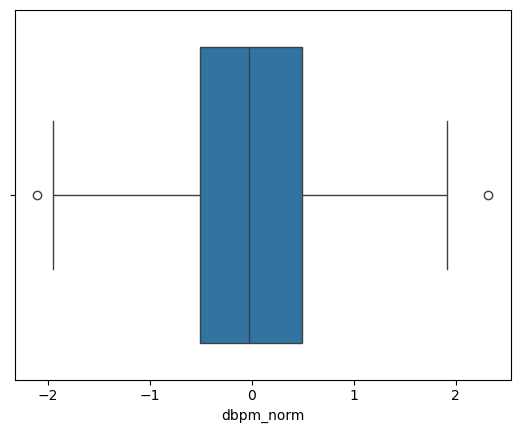

In [53]:
# Display boxplot to display the distribution of a column
sns.boxplot(x=team_stats_calc['dbpm_norm'])

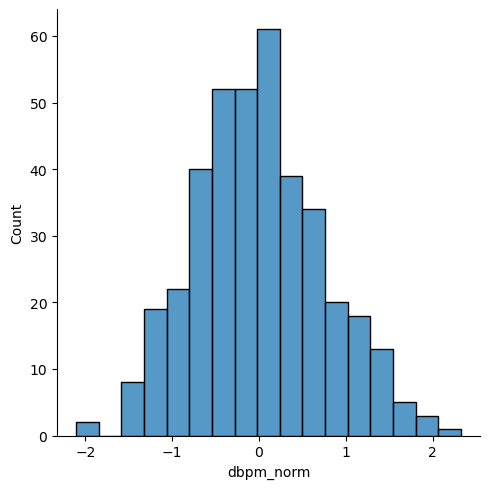

In [54]:
 # Display histogram to display the distribution of a column
 sns.displot(data=team_stats_calc['dbpm_norm'])

<Axes: xlabel='obpm_norm'>

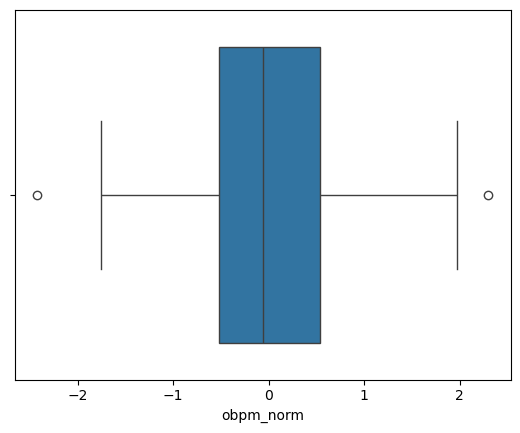

In [55]:
# Display boxplot to display the distribution of a column
sns.boxplot(x=team_stats_calc['obpm_norm'])

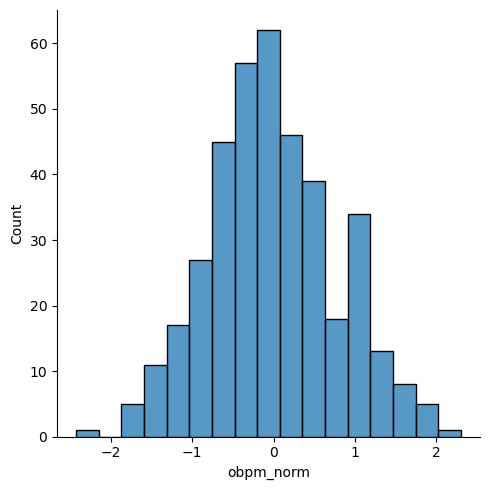

In [56]:
 # Display histogram to display the distribution of a column
 sns.displot(data=team_stats_calc['obpm_norm'])

<Axes: xlabel='pts_per_min'>

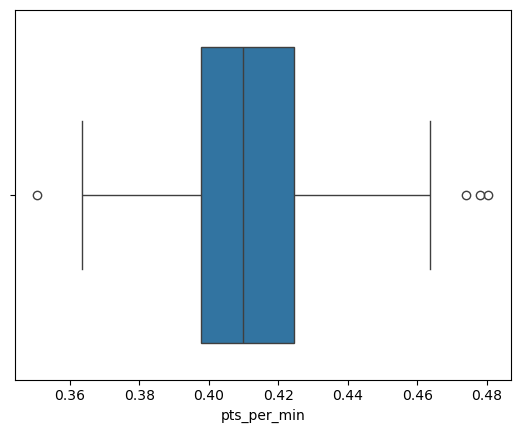

In [57]:
# Display boxplot to display the distribution of a column
sns.boxplot(x=team_stats_calc['pts_per_min'])

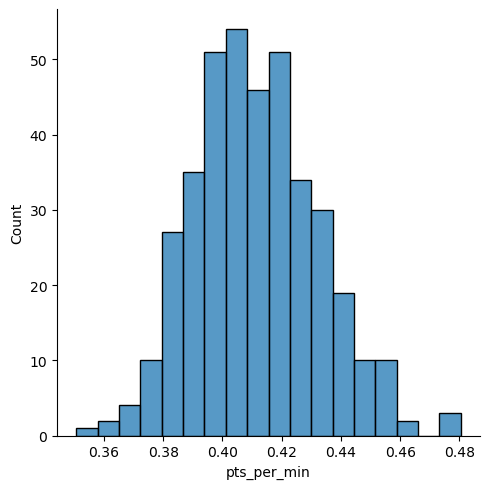

In [58]:
 # Display histogram to display the distribution of a column
 sns.displot(data=team_stats_calc['pts_per_min'])

<Axes: xlabel='2ft_pct'>

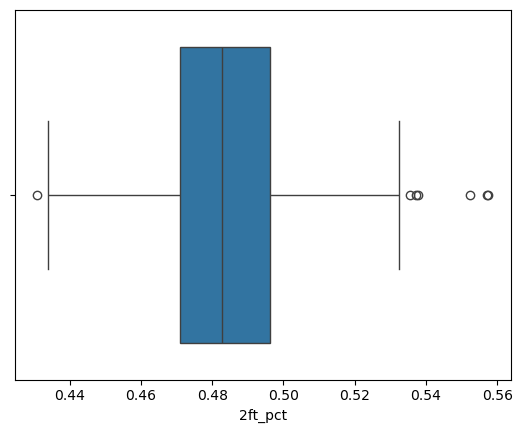

In [59]:
# Display boxplot to display the distribution of a column
sns.boxplot(x=team_stats_calc['2ft_pct'])

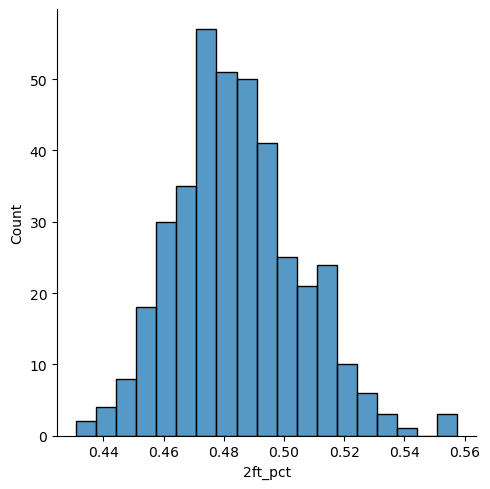

In [60]:
 # Display histogram to display the distribution of a column
 sns.displot(data=team_stats_calc['2ft_pct'])

<Axes: xlabel='3fg_pct'>

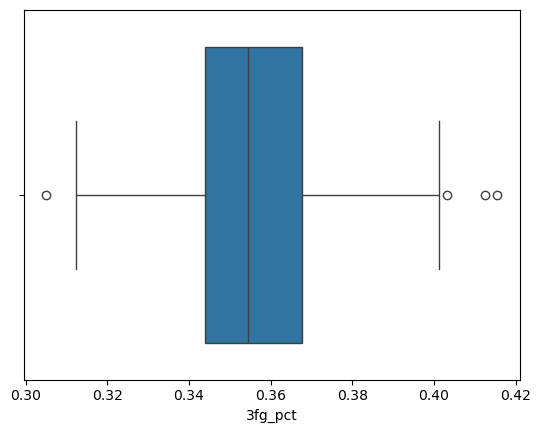

In [61]:
# Display boxplot to display the distribution of a column
sns.boxplot(x=team_stats_calc['3fg_pct'])

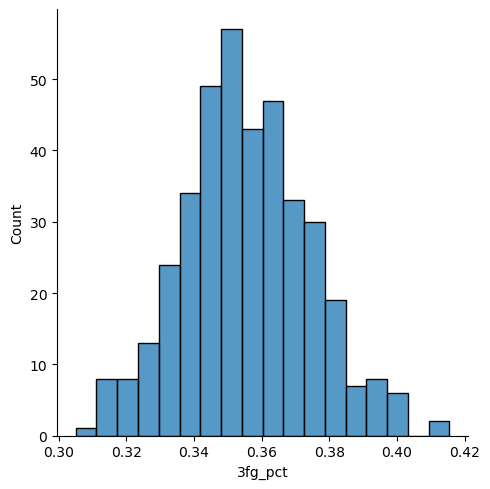

In [62]:
 # Display histogram to display the distribution of a column
 sns.displot(data=team_stats_calc['3fg_pct'])

<Axes: xlabel='ts_pct'>

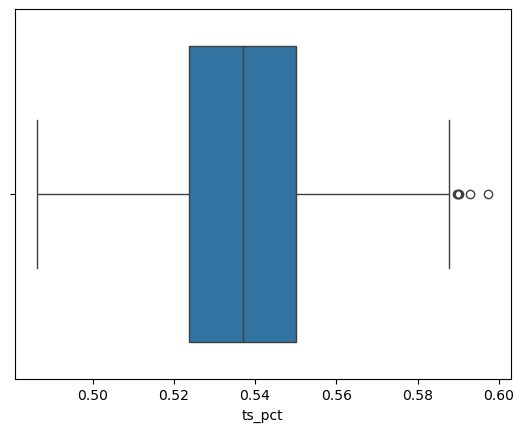

In [63]:
# Display boxplot to display the distribution of a column
sns.boxplot(x=team_stats_calc['ts_pct'])

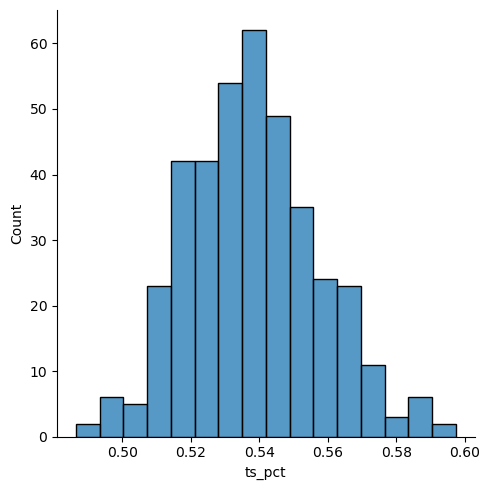

In [64]:
 # Display histogram to display the distribution of a column
 sns.displot(data=team_stats_calc['ts_pct'])

<Axes: xlabel='wins_tot'>

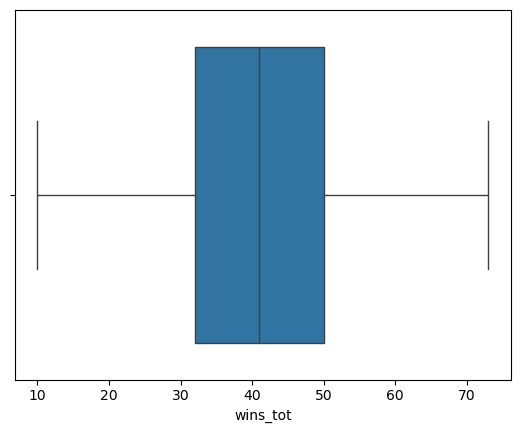

In [65]:
# Display boxplot to display the distribution of a column
sns.boxplot(x=team_stats_calc['wins_tot'])

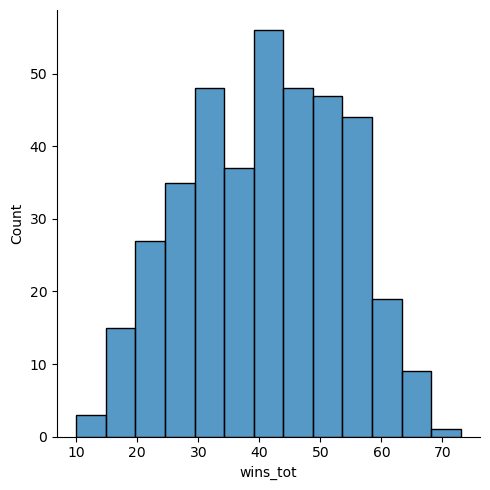

In [66]:
 # Display histogram to display the distribution of a column
 sns.displot(data=team_stats_calc['wins_tot'])

**Discussion:** dbpm_norm and obpm_norm mean and mediam are different from each other. However, the hystogram plots look close to normal distribution. For the rest of the columns mean and mediam are aproximatly the same and the hystogram looks normaly distributes. Thus, standard scaler is the right type of scaler for this data. 
<div> Interesting to note that wins_tot mean and mediam is at 41 as expected becuase at most the team can have 0 wins and at most 82 wins. 
<div> There are some outliers in each calculated column. However, we decided to keep them because on the hysrogram outliers look like a part of the normal distribution. 

### Exploring Outlighers

In [79]:
# Find ouliers' rows
team_stats_calc_dbpm_norm_outliers = team_stats_calc.loc[(team_stats_calc['dbpm_norm'] < -2) | (team_stats_calc['dbpm_norm'] > 2)]
print(team_stats_calc_dbpm_norm_outliers.shape)
team_stats_calc_dbpm_norm_outliers.head(25)

(2, 7)


,dbpm_norm,obpm_norm,pts_per_min,2ft_pct,3fg_pct,ts_pct,wins_tot
24,2.322030,-0.278643,0.379701,0.459766,0.357895,0.510664,57
85,-2.103661,1.308800,0.424155,0.486614,0.370938,0.550692,35


In [80]:
# Find ouliers' rows
team_stats_calc_obpm_norm_outliers = team_stats_calc.loc[(team_stats_calc['obpm_norm'] < -2) | (team_stats_calc['obpm_norm'] > 2)]
print(team_stats_calc_obpm_norm_outliers.shape)
team_stats_calc_obpm_norm_outliers.head(25)

(2, 7)


,dbpm_norm,obpm_norm,pts_per_min,2ft_pct,3fg_pct,ts_pct,wins_tot
4,-0.991224,2.298344,0.435547,0.487530,0.348214,0.536059,52
321,0.187875,-2.421791,0.380871,0.448993,0.320370,0.493824,18


In [88]:
# Filter ouliers' rows
team_stats_calc_RM_dbpm_norm_obpm_norm_outliers = team_stats_calc.loc[(team_stats_calc['dbpm_norm'] > -2) & (team_stats_calc['dbpm_norm'] < 2)]
team_stats_calc_RM_dbpm_norm_obpm_norm_outliers = team_stats_calc_RM_dbpm_norm_obpm_norm_outliers.loc[(team_stats_calc['obpm_norm'] > -2) & (team_stats_calc['obpm_norm'] < 2)]
print(team_stats_calc.shape)
team_stats_calc_RM_dbpm_norm_obpm_norm_outliers.shape

(389, 7)


(385, 7)

In [89]:
# Detect range of values
team_stats_calc_RM_dbpm_norm_obpm_norm_outliers.describe()

,dbpm_norm,obpm_norm,pts_per_min,2ft_pct,3fg_pct,ts_pct,wins_tot
count,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000,385.000000
mean,0.002214,-0.002686,0.411625,0.484645,0.355658,0.538300,41.002597
std,0.726184,0.762799,0.020857,0.020551,0.018825,0.019199,12.474870
min,-1.950232,-1.755382,0.350651,0.430962,0.305085,0.486444,10.000000
25%,-0.500277,-0.522478,0.397922,0.470935,0.344009,0.523880,32.000000
50%,-0.022917,-0.055262,0.409804,0.482638,0.354517,0.537053,41.000000
75%,0.490280,0.521762,0.424506,0.496269,0.367612,0.549976,50.000000
max,1.918107,1.968003,0.480435,0.557506,0.415509,0.597372,73.000000


<Axes: xlabel='dbpm_norm'>

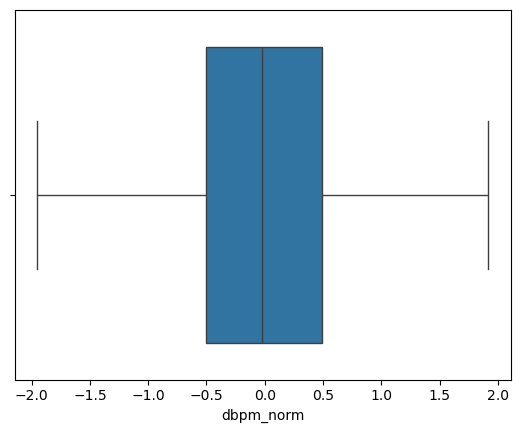

In [90]:
# Display boxplot to display the distribution of a column
sns.boxplot(x=team_stats_calc_RM_dbpm_norm_obpm_norm_outliers['dbpm_norm'])

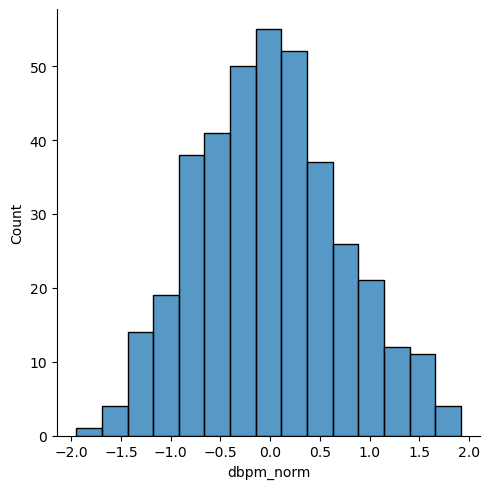

In [91]:
 # Display histogram to display the distribution of a column
 sns.displot(data=team_stats_calc_RM_dbpm_norm_obpm_norm_outliers['dbpm_norm'])

<Axes: xlabel='obpm_norm'>

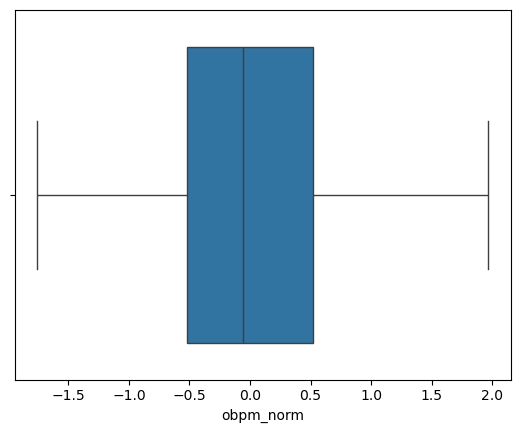

In [92]:
# Display boxplot to display the distribution of a column
sns.boxplot(x=team_stats_calc_RM_dbpm_norm_obpm_norm_outliers['obpm_norm'])

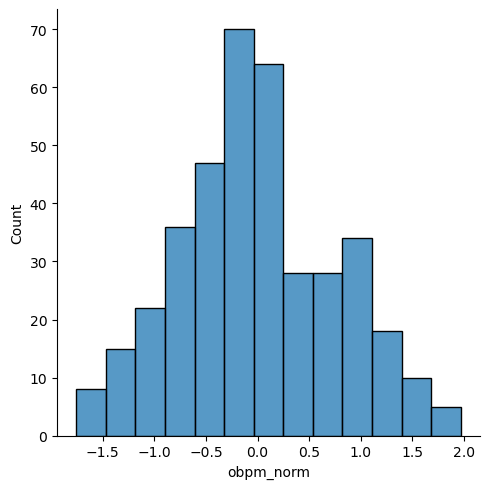

In [93]:
 # Display histogram to display the distribution of a column
 sns.displot(data=team_stats_calc_RM_dbpm_norm_obpm_norm_outliers['obpm_norm'])

**Discussion:** Removing outliers from dbpm_norm and obpm_norm didn't bring mean and median much closer togther and didn't change much the 
    distibution. Thus, it is best to leave outliers as they are a part of the real data. 